# mpl_widget_box Tutorial01


In [1]:
import numpy as np

import matplotlib.pyplot as plt

from mpl_widget_box import (widgets as W,
                            install_widgets_simple)


In [2]:
%matplotlib notebook


In [3]:
class Index:
    def __init__(self):
        self.ind = 0

    def inc(self):
        self.ind += 1
        return self.ind

    def dec(self):
        self.ind -= 1
        return self.ind


<IPython.core.display.Javascript object>


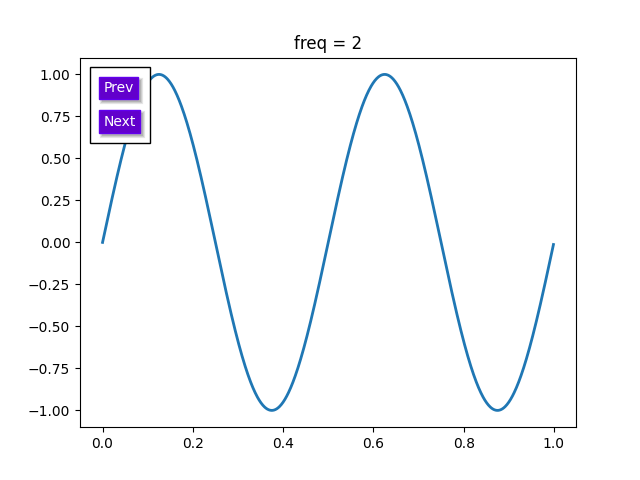

In [4]:
freqs = np.arange(2, 20, 3)
x = np.arange(0.0, 1.0, 0.001)

fig1, ax1 = plt.subplots(num=1, clear=True)

# The instial plot id drawn with 0th freq.
s = np.sin(2*np.pi*freqs[0]*x)
l1, = plt.plot(x, s, lw=2)
ax1.set_title(f"freq = {freqs[0]}")

plt.show()


We will add two buttons; `Prev` and `Next`. Clicking this will either decrease the index of increase it. And we will draw new plot using the current freq.
Instead of clearing the axes, will change the values of exisiting lines.


In [5]:
index = Index()

# We define simple widgets with two buttons.
widgets = [
    W.Button("btn-prev", "Prev", tooltip="Go to prev freq."),
    W.Button("btn-next", "Next", tooltip="Go to next freq."),
]

# A callback function.
def cb(wbm, ev: W.WidgetBoxEvent, status):
    i = None
    if ev.wid == "btn-prev":
        i = index.dec()
    elif ev.wid == "btn-next":
        i = index.inc()

    if i is not None:  # Only when i is changed with `prev` or `next` buttons.
        i =  i % len(freqs) # wrap the i value so that it is within the range.

        ydata = np.sin(2*np.pi*freqs[i]*x) # new y values using the i-th freq.
        l1.set_ydata(ydata)

        ax1.set_title(f"freq = {freqs[i]}")
        print(i)
        wbm.draw_idle()


install_widgets_simple(ax1, widgets, cb)



We can do similar thing we radio buttons.

<IPython.core.display.Javascript object>


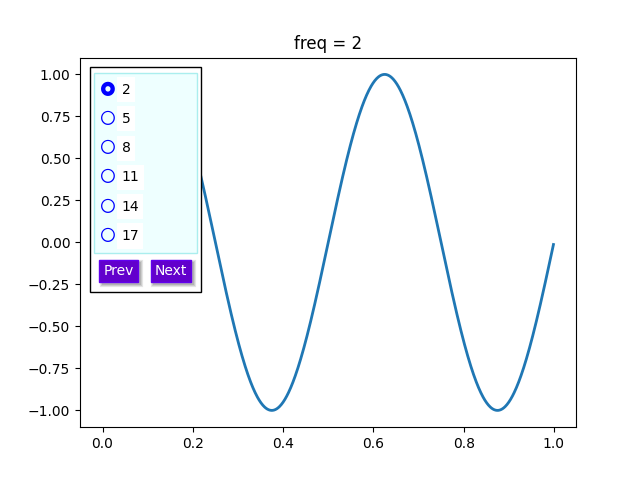

In [6]:
freqs = np.arange(2, 20, 3)
x = np.arange(0.0, 1.0, 0.001)

fig2, ax2 = plt.subplots(num=2, clear=True)

# The instial plot id drawn with 0th freq.
s = np.sin(2*np.pi*freqs[0]*x)
l2, = plt.plot(x, s, lw=2)
ax2.set_title(f"freq = {freqs[0]}")

plt.show()


In [7]:
widgets = [
    W.Radio("radio-freq", [str(c) for c in freqs]),
    W.HWidgets([
        W.Button("btn-prev", 'Prev', tooltip="Go to prev freq."),
        W.Button("btn-next", 'Next', tooltip="Go to next freq."),
    ]),
]

def cb(wbm, ev, status):

    w = wbm.get_widget_by_id("radio-freq")
    i = w.selected

    if ev.wid == "btn-prev":
        i -= 1
    elif ev.wid == "btn-next":
        i += 1

    i = w.select(i) # select method will wrap around i if required.

    y = np.sin(2*np.pi*freqs[i]*x)
    l2.set_ydata(y)
    ax2.set_title(f"freq = {freqs[i]}")

    wbm.draw_idle()  # or you can simply do plt.draw()

install_widgets_simple(ax2, widgets, cb)
